# First Autoencoder

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare dataset

In [5]:
def generate_data(m):
  '''plots m random points on a 3D plane'''
  angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
  data = np.empty((m, 3))
  data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + 0.1 * np.random.rand(m) / 2
  data[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.rand(m) / 2
  data[:, 2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.rand(m)
  return data

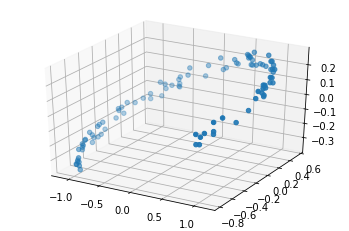

In [6]:
X_train = generate_data(100)
X_train -= X_train.mean(axis=0, keepdims=0)

ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds')

## Build the model

In [11]:
encoder = Sequential([Dense(2, input_shape=[3])])
decoder = Sequential([Dense(3, input_shape=[2])])
autoencoder = Sequential([encoder, decoder])

autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 2)                 8         
_________________________________________________________________
sequential_4 (Sequential)    (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

## Train the model

In [13]:
history = autoencoder.fit(X_train, X_train, epochs=200, verbose=False)

## Plot encoder output

In [14]:
codings = encoder.predict(X_train)
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [ 1.04907977 -0.07137442  0.03491423]
encoded point: [ 0.9803909 -0.5722874]


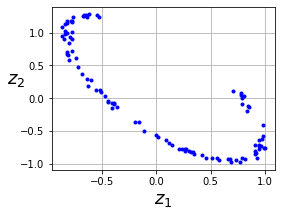

In [15]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot decoder output

In [16]:
decodings = decoder.predict(codings)
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [ 1.04907977 -0.07137442  0.03491423]
encoded point: [ 0.9803909 -0.5722874]
decoded point: [ 1.1031673  -0.07466108  0.0867074 ]


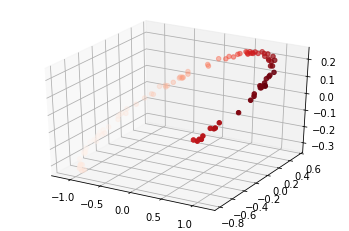

In [17]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds')